In [1]:
import os

os.chdir("C:\\Users\\olya\\Downloads")

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
from ipywidgets import HTML
from ipyleaflet import Map, Marker, Popup

In [2]:
df = pd.read_csv('ALL_SPB_STOPS.CSV', sep=";", header = 0, index_col=False,encoding='Windows-1251')

In [3]:
df.insert(4,"S",0)

In [4]:
df.head(38)

,ID_STOP,STOP_NAME,LATITUDE,LONGITUDE,S
0,100101,Пр.Ветеранов-1,59.841604,30.253984,0
1,100102,Пр.Ветеранов-2,59.842042,30.250084,0
2,100103,Ленинский пр.-1,59.851683,30.268385,0
3,100104,Ленинский пр.-2,59.849710,30.268348,0
4,100105,Автово,59.867292,30.261133,0
5,100106,Кировский завод,59.879753,30.261631,0
6,100107,Нарвская,59.901064,30.274819,0
7,100108,Балтийская,59.907428,30.299786,0
8,100109,Пушкинская,59.920514,30.329678,0
9,100110,Владимирская,59.927611,30.348374,0


In [5]:
df['S']=0

In [6]:
df.dtypes

ID_STOP        int64
STOP_NAME     object
LATITUDE     float64
LONGITUDE    float64
S              int64
dtype: object

In [7]:
df['ID_STOP'] = df['ID_STOP'].astype(str)

In [8]:
gor = df[(df['ID_STOP'].str.startswith('100'))&(df['STOP_NAME']=='Горьковская')]
print(gor)

   ID_STOP    STOP_NAME   LATITUDE  LONGITUDE  S
36  100214  Горьковская  59.956301  30.318997  0


In [9]:
gorlong=gor.loc[36].at['LONGITUDE']
gorlat=gor.loc[36].at['LATITUDE']
print(gorlong)
gorlat

30.3189969457719


59.9563008079342

In [10]:
A=abs(df['LATITUDE']-gorlat)*116.16
B=abs(df['LONGITUDE']-gorlong)*113.3*np.cos(np.minimum(df['LATITUDE'],gorlat))
temp=(A/6400)*(A/6400)+(B/6400)*(B/6400)
C=np.sqrt(temp)*6400

In [11]:
df['S']=C

In [12]:
df.head()

,ID_STOP,STOP_NAME,LATITUDE,LONGITUDE,S
0,100101,Пр.Ветеранов-1,59.841604,30.253984,15.183257
1,100102,Пр.Ветеранов-2,59.842042,30.250084,15.353283
2,100103,Ленинский пр.-1,59.851683,30.268385,13.405717
3,100104,Ленинский пр.-2,59.849710,30.268348,13.616366
4,100105,Автово,59.867292,30.261133,12.188046


In [13]:
st=df[df['S']<1]
st=st.drop(labels=[36])
st.index=(range(len(st)))
st

,ID_STOP,STOP_NAME,LATITUDE,LONGITUDE,S
0,1383,БОЛЬШАЯ МОНЕТНАЯ УЛ. [46А],59.960944,30.316399,0.609547
1,16072,"Сытный рынок T (6, 40)",59.956379,30.311045,0.869340
2,16077,"Метро ""Горьковская"" T (6, 40)",59.956536,30.319330,0.045550
3,16083,"Троицкая площадь T (6, 40)",59.954522,30.326731,0.870689
4,16150,"Троицкая площадь T (6, 40)",59.954751,30.326880,0.880631
5,16153,"Метро ""Горьковская"" Т (6, 40)",59.956591,30.319479,0.062550
6,16158,"Сытный рынок T (6, 40)",59.956605,30.311727,0.795436
7,17847,Б. МОНЕТНАЯ УЛ. (тест),59.961946,30.315037,0.785707
8,17848,ТРОИЦКАЯ ПЛ. (тест),59.954098,30.322533,0.463727
9,17915,ТРОИЦКАЯ ПЛ. (тест)<,59.953811,30.323404,0.562226


In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

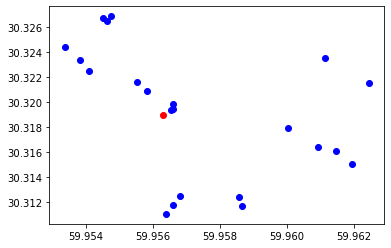

In [15]:
x=st['LATITUDE']
y=st['LONGITUDE']
plt.plot(x, y,'bo')
plt.plot(gorlat,gorlong,'ro')

In [16]:
link=linkage(st.drop(['ID_STOP','STOP_NAME','S'],axis=1),'ward','euclidean')

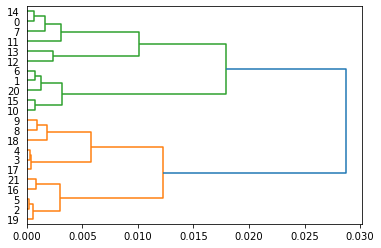

In [17]:
dn=dendrogram(link,orientation='right')

In [18]:
st['cluster']=fcluster(link,4,criterion='maxclust')

In [19]:
st.groupby('cluster').size()

cluster
1    5
2    6
3    5
4    6
dtype: int64

In [20]:
for i in range(5): print("Номер кластера",i,"\n",st[st['cluster']==i]['STOP_NAME'])

Номер кластера 0 
 Series([], Name: STOP_NAME, dtype: object)
Номер кластера 1 
 2      Метро "Горьковская" T (6, 40)
5      Метро "Горьковская" Т (6, 40)
16           СТ. МЕТРО "ГОРЬКОВСКАЯ"
19           Ст. метро "Горьковская"
21    СТ. МЕТРО "ГОРЬКОВСКАЯ" [46А]<
Name: STOP_NAME, dtype: object
Номер кластера 2 
 3      Троицкая площадь T (6, 40)
4      Троицкая площадь T (6, 40)
8             ТРОИЦКАЯ ПЛ. (тест)
9            ТРОИЦКАЯ ПЛ. (тест)<
17    ТРОИЦКАЯ ПЛОЩАДЬ [46А, 49]<
18                   ТРОИЦКАЯ ПЛ.
Name: STOP_NAME, dtype: object
Номер кластера 3 
 1     Сытный рынок T (6, 40)
6     Сытный рынок T (6, 40)
10              СЫТНЫЙ РЫНОК
15            СЫТНИНСКАЯ УЛ.
20              СЫТНЫЙ РЫНОК
Name: STOP_NAME, dtype: object
Номер кластера 4 
 0     БОЛЬШАЯ МОНЕТНАЯ УЛ. [46А]
7         Б. МОНЕТНАЯ УЛ. (тест)
11               АВСТРИЙСКАЯ ПЛ.
12               М. МОНЕТНАЯ УЛ.
13               М. МОНЕТНАЯ УЛ.
14         КАМЕННООСТРОВСКИЙ ПР.
Name: STOP_NAME, dtype: object


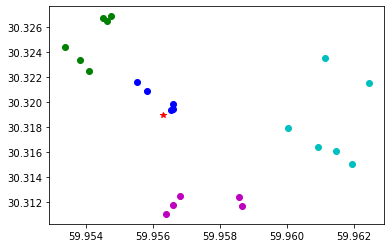

In [21]:
x1=st[st['cluster']==1]['LATITUDE']
y1=st[st['cluster']==1]['LONGITUDE']

x2=st[st['cluster']==2]['LATITUDE']
y2=st[st['cluster']==2]['LONGITUDE']

x3=st[st['cluster']==3]['LATITUDE']
y3=st[st['cluster']==3]['LONGITUDE']

x4=st[st['cluster']==4]['LATITUDE']
y4=st[st['cluster']==4]['LONGITUDE']

plt.plot(x1, y1,'bo')
plt.plot(x2, y2,'go')
plt.plot(x3, y3,'mo')
plt.plot(x4, y4,'co')
plt.plot(gorlat,gorlong,'r*')

In [22]:
stops_coordinates=[]
i = 0
while i < len(st.index):
    stops_coordinates.append({'index': i, 'Coordinates': [st['LATITUDE'][i], st['LONGITUDE'][i]], 'Location': st['STOP_NAME'][i]})
    i += 1

In [23]:
marker_coordinates = [stops['Coordinates'] for stops in stops_coordinates]
marker_coordinates = [[float(x) for x in y] for y in marker_coordinates]

In [24]:
m = Map(center=(gorlat, gorlong), zoom=15)

In [25]:
markers = [Marker(location=(marker_coordinates[i])) for i in range(len(marker_coordinates))]

In [26]:
info_box_template = """
<dl>
<dt>Адрес:</dt><dd>{Location}
</dl>
"""

In [27]:
locations_info  = [info_box_template.format(**point) for point in stops_coordinates]

In [28]:
for i in range(len(markers)):
    markers[i].popup = HTML(locations_info[i])
    m.add_layer(markers[i])

In [29]:
m

Map(center=[59.9563008079342, 30.3189969457719], controls=(ZoomControl(options=['position', 'zoom_in_text', 'z…